In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv(r"C:\Users\LENOVO\Desktop\KodluyoruzBootcamp\Ödevler Ve Çalışmalar\hmelq.csv")
df1 = pd.read_excel(r"C:\Users\LENOVO\Desktop\KodluyoruzBootcamp\Ödevler Ve Çalışmalar\HW_Data_Set.xlsx")

In [2]:
df.head(2)

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479


In [3]:
df1.head(2)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198


In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df.dropna(inplace=True)
dff = df.copy()

lbe = LabelEncoder()

dff["reason"] = lbe.fit_transform(dff["reason"])
dff  = pd.get_dummies(dff,columns= ["job"], prefix= ["job"])

y = dff["bad"]
X = dff.drop(["bad"],axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state = 42,
                                                 test_size = 0.25)

In [5]:
import Classes1 as cl

In [6]:
result = cl.Methods()


Learning rate set to 0.012295
0:	learn: 0.6789078	total: 61.6ms	remaining: 1m 1s
1:	learn: 0.6664166	total: 65.1ms	remaining: 32.5s
2:	learn: 0.6532250	total: 68.6ms	remaining: 22.8s
3:	learn: 0.6405088	total: 72.3ms	remaining: 18s
4:	learn: 0.6281166	total: 75.9ms	remaining: 15.1s
5:	learn: 0.6168623	total: 79.6ms	remaining: 13.2s
6:	learn: 0.6055919	total: 83.6ms	remaining: 11.9s
7:	learn: 0.5942195	total: 87.6ms	remaining: 10.9s
8:	learn: 0.5827880	total: 91.9ms	remaining: 10.1s
9:	learn: 0.5721912	total: 95.4ms	remaining: 9.44s
10:	learn: 0.5640020	total: 97.5ms	remaining: 8.77s
11:	learn: 0.5537839	total: 101ms	remaining: 8.32s
12:	learn: 0.5439061	total: 105ms	remaining: 7.96s
13:	learn: 0.5336567	total: 108ms	remaining: 7.64s
14:	learn: 0.5248870	total: 112ms	remaining: 7.36s
15:	learn: 0.5168208	total: 116ms	remaining: 7.14s
16:	learn: 0.5080924	total: 120ms	remaining: 6.94s
17:	learn: 0.4999380	total: 124ms	remaining: 6.76s
18:	learn: 0.4918237	total: 128ms	remaining: 6.62s
19

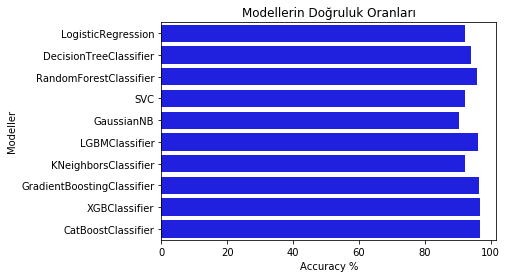

In [7]:
result.AllModelsClass(X_train, y_train, X_test, y_test)

# Regresyon

In [8]:
df2 = pd.read_excel(r"C:\Users\LENOVO\Desktop\KodluyoruzBootcamp\Ödevler Ve Çalışmalar\HW_Data_Set.xlsx")

In [9]:
df2.loc[df1[df2["ind_420"] == "?"].index] = np.nan 

# Degisken donusturmeden once icerisinde NAN degerler oldugu icin ilk once bu OBJECT tipindeki degiskenlerin NAN degerlerini degistiriyoruz
# Ardindan donusum gercelestiriyoruz

df2["ind_422"] = df2["ind_422"].fillna(df2.mean()["ind_422"])
df2["ind_420"] = df2["ind_420"].fillna(df2.mean()["ind_420"])

df2["ind_422"] = df2["ind_422"].astype('int32')
df2["ind_420"] = df2["ind_420"].astype('int32')

# Geriye kalan NaN degiskenleri de dolduruyoruz

column = list(df2.select_dtypes(include=["int32","float64"]))
df2[column] = df2[column].apply(lambda x: x.fillna(x.mean()),axis=0)

In [10]:
df2 = pd.get_dummies(df2,columns= ["ind_109"], prefix= ["ind_109"])

df2 = df2.drop(["ind_109_RED"],axis=1)

df2.drop(labels=["20_target","90_target"],axis=1,inplace=True)


X = df2.drop(labels="50_target",axis=1)
y = df2["50_target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 42,shuffle = False)

Learning rate set to 0.051853
0:	learn: 30.0101809	total: 32.7ms	remaining: 32.7s
1:	learn: 29.6776479	total: 56.8ms	remaining: 28.3s
2:	learn: 29.3099478	total: 90.5ms	remaining: 30.1s
3:	learn: 28.9717060	total: 117ms	remaining: 29.2s
4:	learn: 28.7026491	total: 149ms	remaining: 29.6s
5:	learn: 28.4368243	total: 174ms	remaining: 28.8s
6:	learn: 28.1637874	total: 210ms	remaining: 29.8s
7:	learn: 27.8830448	total: 253ms	remaining: 31.3s
8:	learn: 27.5966198	total: 289ms	remaining: 31.9s
9:	learn: 27.3589761	total: 318ms	remaining: 31.5s
10:	learn: 27.0940761	total: 346ms	remaining: 31.1s
11:	learn: 26.9443331	total: 376ms	remaining: 30.9s
12:	learn: 26.7202573	total: 405ms	remaining: 30.8s
13:	learn: 26.4859724	total: 441ms	remaining: 31s
14:	learn: 26.2499842	total: 472ms	remaining: 31s
15:	learn: 26.0151902	total: 495ms	remaining: 30.5s
16:	learn: 25.8085718	total: 527ms	remaining: 30.5s
17:	learn: 25.6124888	total: 556ms	remaining: 30.3s
18:	learn: 25.4290588	total: 579ms	remaining:

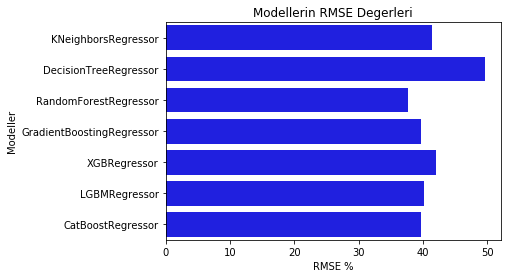

In [11]:
result.AllModelReg(X_train,y_train,X_test,y_test)